/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


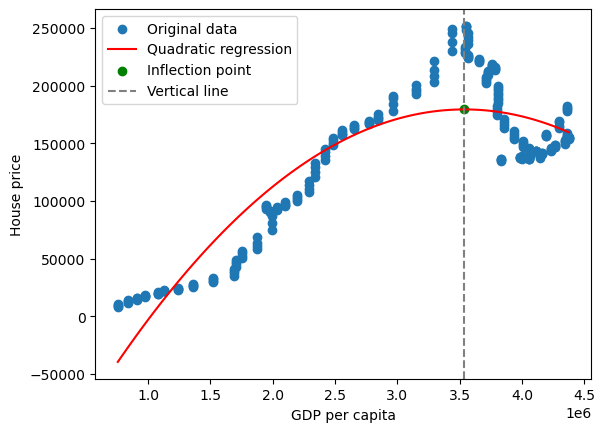

Inflection point coordinates: (3537582.50, 179279.24)


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

file_path = "./data/final2.csv"
df = pd.read_csv(file_path)

X = df[['GDP per capita (current US$)']]
y = df['House price']

# Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# peak
coefs = model.coef_
second_derivative = 2 * coefs[2]
inflection_x = -coefs[1] / (2 * coefs[2])
inflection_y = model.predict(poly.transform([[inflection_x]]))

# Plot 
plt.scatter(X, y, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')
plt.scatter(inflection_x, inflection_y, color='green', label='Inflection point')
plt.axvline(x=inflection_x, color='gray', linestyle='--', label='Vertical line')
plt.xlabel('GDP per capita')
plt.ylabel('House price')
plt.legend()
plt.show()

print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))


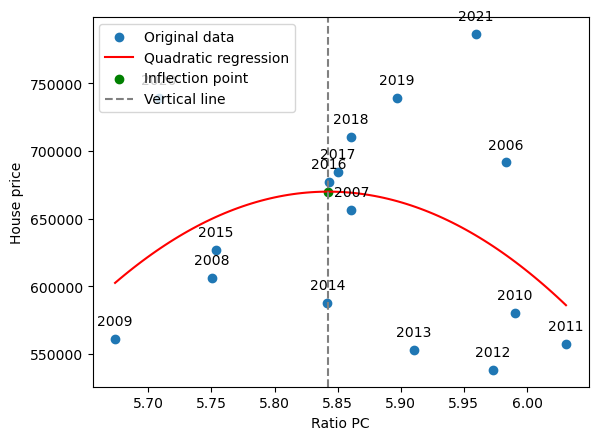

Inflection point coordinates: (5.84, 669883.05)


In [36]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Read
file_path = "./data/final3.csv"
df = pd.read_csv(file_path)

# Sort
df = df.sort_values(by='YEAR')

# get data
years = df['YEAR']
ratio_pc = df['ratio_pc']
y = df['houcse price']

# regression
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(ratio_pc.values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y)

X_smooth = np.linspace(ratio_pc.min(), ratio_pc.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# peak
coefs = model.coef_
second_derivative = 2 * coefs[2]
inflection_x = -coefs[1] / (2 * coefs[2])
inflection_y = model.predict(poly.transform([[inflection_x]]))

# plot
plt.scatter(ratio_pc, y, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')
plt.scatter(inflection_x, inflection_y, color='green', label='Inflection point')
plt.axvline(x=inflection_x, color='gray', linestyle='--', label='Vertical line')

for i, year in enumerate(years):
    plt.annotate(year, (ratio_pc.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Ratio PC')
plt.ylabel('House price')
plt.legend()
plt.show()

print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))


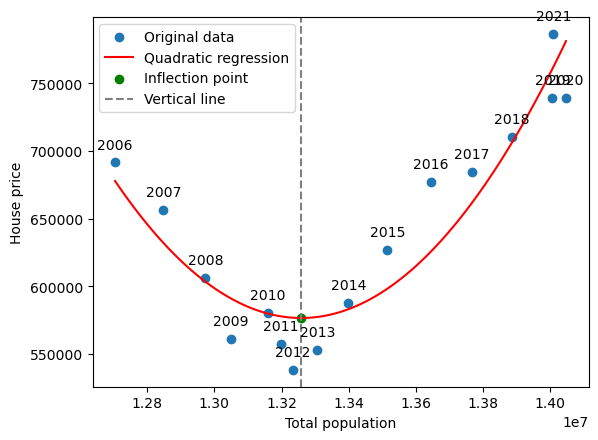

Inflection point coordinates: (13258776.57, 576481.74)


In [44]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
file_path = "./data/final3.csv"
df = pd.read_csv(file_path)

# Sort data by time series
df = df.sort_values(by='YEAR')

# Process Total population (65 and over) column by removing commas and converting to float
df['Total population'] = df['Total population'].str.replace(',', '').astype(float)

# Get data
years = df['YEAR']
y2 = df['houcse price']
y4 = df['Total population']

# regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(y4.values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y2)

# Generate smooth X values for plotting
X_smooth = np.linspace(y4.min(), y4.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# peak 
coefs = model.coef_
second_derivative = 2 * coefs[2]
inflection_x = -coefs[1] / (2 * coefs[2])
inflection_y = model.predict(poly.transform([[inflection_x]]))

# Plot 
plt.scatter(y4, y2, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')
plt.scatter(inflection_x, inflection_y, color='green', label='Inflection point')
plt.axvline(x=inflection_x, color='gray', linestyle='--', label='Vertical line')

# add year
for i, year in enumerate(years):
    plt.annotate(year, (y4.iloc[i], y2.iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Total population')
plt.ylabel('House price')
plt.legend()
plt.show()

print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))

In [48]:
file_path = "./data/final3.csv"
df = pd.read_csv(file_path)

df['Total population'] = df['Total population'].str.replace(',', '').astype(float)
correlation = df['houcse price'].corr(df['Total population'])
print("Correlation between 'houcse price' and 'Total population': {:.2f}".format(correlation))


Correlation between 'houcse price' and 'Total population': 0.64


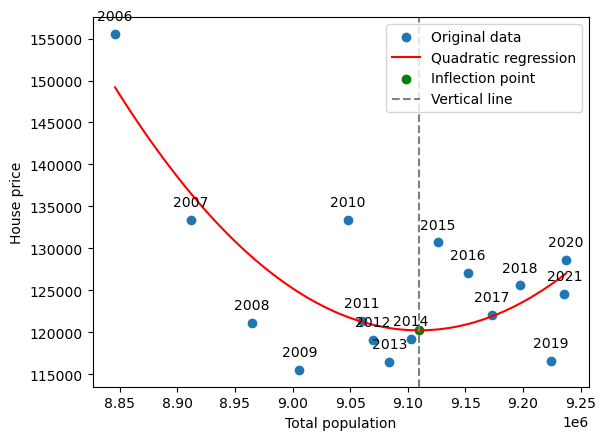

Inflection point coordinates: (9109751.69, 120214.97)


In [50]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np

# Read CSV file
file_path = "./data/final4.csv"
df = pd.read_csv(file_path)

# Sort data by time series
df = df.sort_values(by='YEAR')

# Process Total population (65 and over) column by removing commas and converting to float
df['Total population'] = df['Total population'].str.replace(',', '').astype(float)

# Get data
years = df['YEAR']
y2 = df['houcse price']
y4 = df['Total population']

# regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(y4.values.reshape(-1, 1))
model = LinearRegression()
model.fit(X_poly, y2)

# Generate smooth X values for plotting
X_smooth = np.linspace(y4.min(), y4.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# peak 
coefs = model.coef_
second_derivative = 2 * coefs[2]
inflection_x = -coefs[1] / (2 * coefs[2])
inflection_y = model.predict(poly.transform([[inflection_x]]))

# Plot 
plt.scatter(y4, y2, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')
plt.scatter(inflection_x, inflection_y, color='green', label='Inflection point')
plt.axvline(x=inflection_x, color='gray', linestyle='--', label='Vertical line')

# add year
for i, year in enumerate(years):
    plt.annotate(year, (y4.iloc[i], y2.iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')

plt.xlabel('Total population')
plt.ylabel('House price')
plt.legend()
plt.show()

print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))


In [51]:
file_path = "import pandas as pd

# Read the original CSV file
input_file_path = "original.csv"
df = pd.read_csv(input_file_path)

# Create a new DataFrame to hold the repeated values
new_df = pd.DataFrame()

# Repeat the values in the third column four times
new_df['column3_copy'] = df['column3'].repeat(4)

# Reset the index to ensure it's unique
new_df.reset_index(drop=True, inplace=True)

# Save the new DataFrame to a CSV file
output_file_path = "output.csv"
new_df.to_csv(output_file_path, index=False)
final4.csv"
df = pd.read_csv(file_path)

df['Total population'] = df['Total population'].str.replace(',', '').astype(float)
correlation = df['houcse price'].corr(df['Total population'])
print("Correlation between 'houcse price' and 'Total population': {:.2f}".format(correlation))

Correlation between 'houcse price' and 'Total population': -0.48


In [55]:
import pandas as pd

input_file_path = "./data/final5.csv"
df = pd.read_csv(input_file_path)

new_df = pd.DataFrame()
new_df['population'] = df.iloc[:, 2].repeat(4)  

output_file_path = "./data/output.csv"
new_df.to_csv(output_file_path, index=False)

/opt/conda/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.11/site-packages/matplotlib/text.py:1475: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(x))


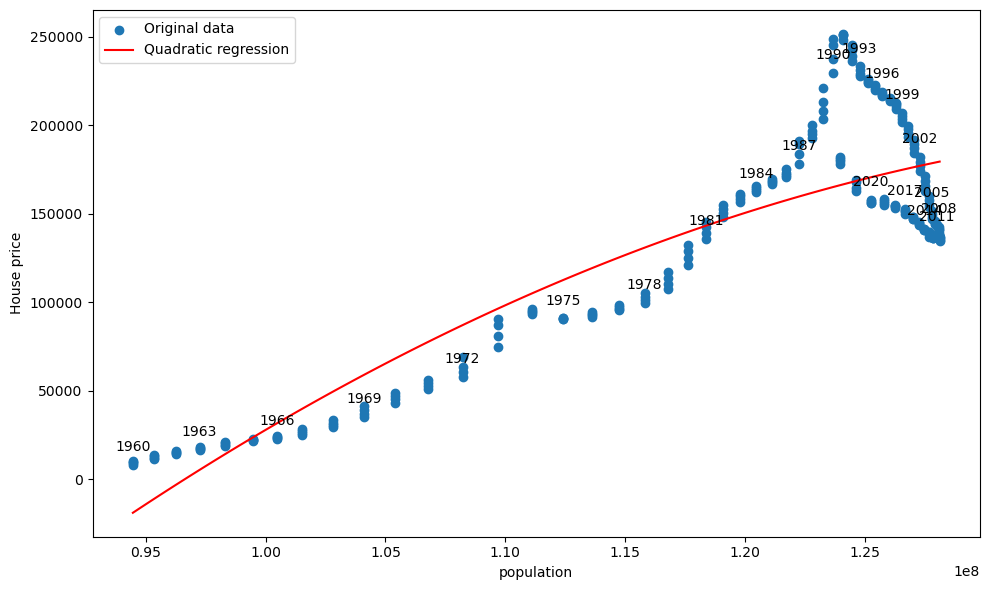

Inflection point coordinates: (143648928.29, 201499.12)


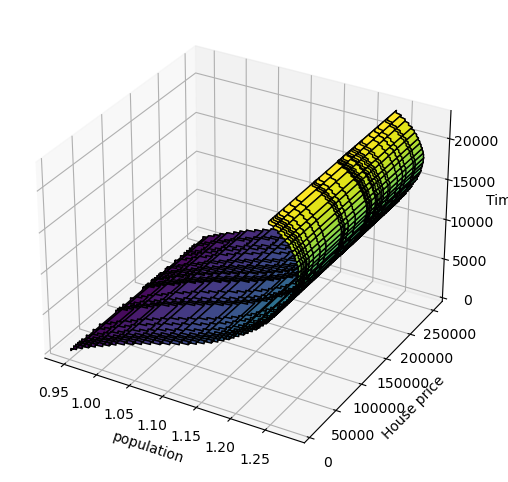

In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

# Read CSV file
file_path = "./data/final6.csv"
df = pd.read_csv(file_path)

# Create a time series, starting from 1960 to 2022, with a quarterly frequency
time_series = pd.date_range(start='1960-01-01', end='2022-12-31', freq='Q')

# Add the time series as a new column
df['YEAR'] = time_series

# Convert datetime to numerical values
df['NUM_YEAR'] = df['YEAR'].sub(df['YEAR'].min()).dt.days

# Select data
X = df[['population']]
y = df['House price']
z = df['NUM_YEAR']

# Polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth X values for plotting
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_pred = model.predict(X_smooth_poly)

# Create a larger plot
plt.figure(figsize=(10, 6))

# Plot
plt.scatter(X, y, label='Original data')
plt.plot(X_smooth, y_pred, color='red', label='Quadratic regression')

# Add year annotations every 3 years
years_interval = 3
previous_year = None
for i, row in df.iterrows():
    year = row['YEAR'].year
    if previous_year is None or year - previous_year >= years_interval:
        plt.annotate(year, (X.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(0, 10), ha='center')
        previous_year = year

plt.xlabel('population')
plt.ylabel('House price')
plt.legend()
plt.tight_layout()  # Optimize layout for better readability
plt.show()

print("Inflection point coordinates: ({:.2f}, {:.2f})".format(inflection_x, inflection_y[0]))

# Create a 3D surface plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
X_2D, Y_2D = np.meshgrid(X, y)  # Create a 2D grid
Z_2D = np.tile(z, (len(X), 1))   # Tile z values to match the grid shape
ax.plot_surface(X_2D, Y_2D, Z_2D, cmap='viridis', edgecolor='k')
ax.set_xlabel('population')
ax.set_ylabel('House price')
ax.set_zlabel('Time')
plt.show()


### Analyst
- Due to the previous economic recession, under the same population, Japan's house prices are lower than before, but they have been slowly rising in recent years.
- 